In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [0]:
def computeCost(X,y,theta):
  m = len(y)
  predictions = X.dot(theta)
  sq_error = (predictions - y)**2
  
  return 1/(2*m) * np.sum(sq_error)  

In [0]:
def gradientDescent(X,y,theta,alpha,num_iters):
  m = len(y)
  J_history = []
  for i in range(num_iters):
    predictions = X.dot(theta)
    error = np.dot(X.transpose(),(predictions - y))
    descent = alpha * (1/m) * error
    theta -= descent
    J_history.append(computeCost(X,y,theta))
  return theta,J_history

In [0]:
def predict(X,theta):
  predictions = np.dot(theta.transpose(),X)
  
  return predictions[0]

In [0]:
data = pd.read_csv('ex1data2.txt',header=None)

In [8]:
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [9]:
data.describe()

,0,1,2
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [0]:
def featureNormalize(X):
  mean = np.mean(X,axis=0)
  std = np.std(X,axis=0)
  X_norm = (X-mean)/std
  
  return X_norm , mean , std

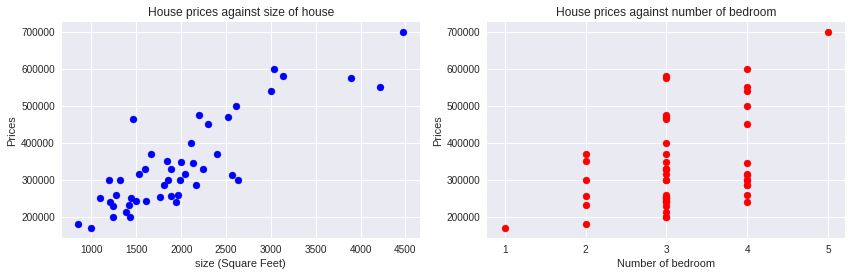

In [14]:
fig , axes = plt.subplots(figsize=(12,4),nrows=1,ncols=2)

axes[0].scatter(data[0],data[2],color='b')
axes[0].set_xlabel("size (Square Feet)")
axes[0].set_ylabel("Prices")
axes[0].set_title("House prices against size of house")
axes[1].scatter(data[1],data[2],color="r")
axes[1].set_xlabel("Number of bedroom")
axes[1].set_ylabel("Prices")
axes[1].set_xticks(np.arange(1,6,step=1))
axes[1].set_title("House prices against number of bedroom")

plt.tight_layout()

In [0]:
data_n = data.values
m2 = len(data_n[:,-1])
X2 = data_n[:,0:2].reshape(m2,2)
X2 , X2_mean , X2_std = featureNormalize(X2)
X2 = np.append(np.ones((m2,1)),X2,axis=1)
y2=data_n[:,-1].reshape(m2,1)
theta2=np.zeros((3,1))

In [20]:
print(computeCost(X2,y2,theta2))

65591548106.45744


In [0]:
alpha = 0.01
num_iters = 400

In [33]:
theta2, J_history2 = gradientDescent(X2,y2,theta2,alpha,num_iters)
print("h(x) ="+str(round(theta2[0,0],2))+" + "+str(round(theta2[1,0],2))+"x1 + "+str(round(theta2[2,0],2))+"x2")

h(x) =340412.66 + 109446.33x1 + -6576.89x2


Text(0.5, 1.0, 'Cost function using Gradient Descent')

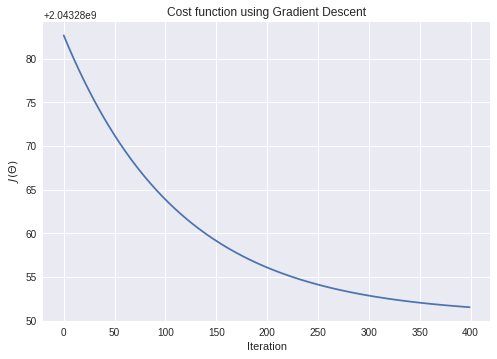

In [34]:
plt.plot(J_history2)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [35]:
#feature normalisation of x values
x_sample = featureNormalize(np.array([1650,3]))[0]
x_sample=np.append(np.ones(1),x_sample)
predict3=predict(x_sample,theta2)
print("For size of house = 1650, Number of bedroom = 3, we predict a house value of $"+str(round(predict3,0)))

For size of house = 1650, Number of bedroom = 3, we predict a house value of $456436.0
